In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Read the dataset**

In [ ]:
#read the csv file
df = pd.read_csv('shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# **Process of the cleaning** **data**

In [ ]:
df.info()
pd.isnull(df).sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

Customer ID                 3900
Age                           53
Gender                         2
Item Purchased                25
Category                       4
Purchase Amount (USD)         81
Location                      50
Size                           4
Color                         25
Season                         4
Review Rating                 26
Subscription Status            2
Payment Method                 6
Shipping Type                  6
Discount Applied               2
Promo Code Used                2
Previous Purchases            50
Preferred Payment Method       6
Frequency of Purchases         7
dtype: int64

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# **Customer** **demographics**

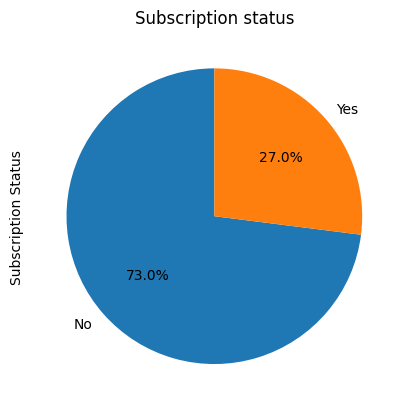

In [ ]:
subscription_status = df['Subscription Status'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', startangle= 90 )
plt.title('Subscription status')
plt.show()

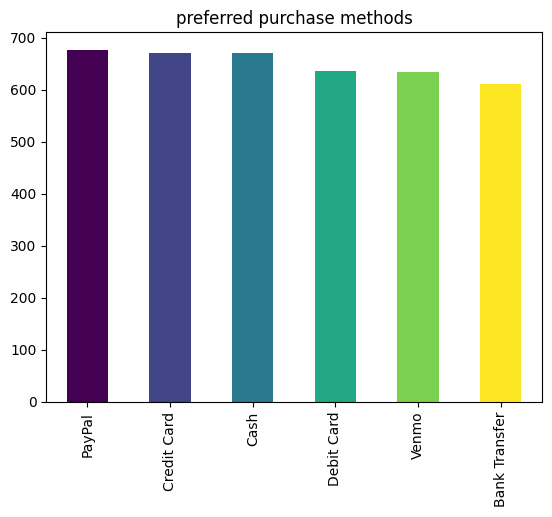

In [ ]:
purchase_methods = df['Preferred Payment Method'].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(purchase_methods)))

purchase_methods.plot(kind = 'bar', color = colors)

plt.title('preferred purchase methods')
plt.show()

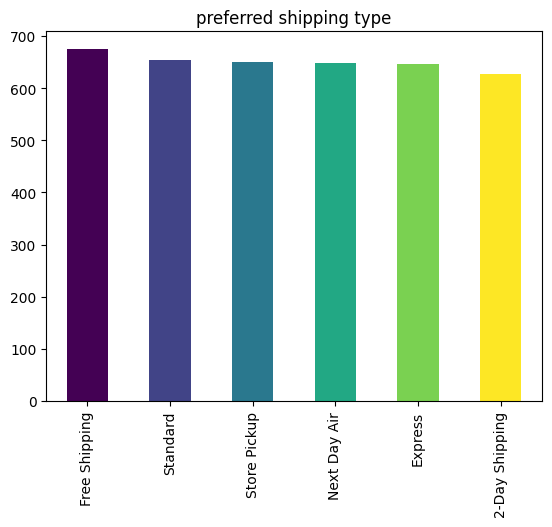

In [ ]:
shipping_type = df['Shipping Type'].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(shipping_type)))

shipping_type.plot(kind = 'bar', color = colors)

plt.title('preferred shipping type')
plt.show()

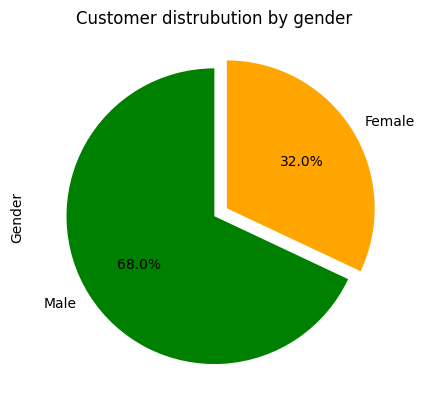

In [ ]:
gender = df['Gender'].value_counts()
colors = ['green', 'orange']
explode = (0, 0.1)
gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90, colors = colors, explode = explode)
plt.title('Customer distrubution by gender')
plt.show()

In [ ]:
df['Gender'].value_counts()

Male      2652
Female    1248
Name: Gender, dtype: int64

In [ ]:
min_age = df['Age'].min()
max_age = df['Age'].max()
mean_age = df['Age'].mean().round()

print(f"minimal age is {min_age}, while maximal age is {max_age}")
print(f"the average is {mean_age}")

minimal age is 18, while maximal age is 70
the average is 44.0


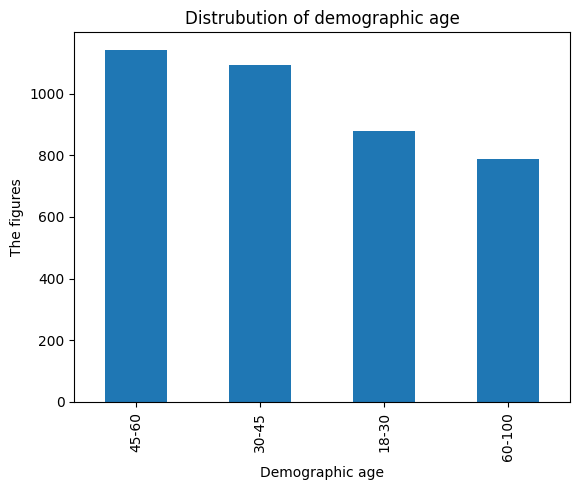

In [ ]:
#categorizing ages into demographic ages
age_bins = [18, 30, 45, 60, 100]
age_labels = ['18-30', '30-45', '45-60', '60-100']

age_segment = pd.cut(df['Age'], bins = age_bins, labels = age_labels, right = False)

df['Age Segment'] = age_segment

age_segment.value_counts().plot(kind = 'bar')

plt.xlabel('Demographic age')
plt.ylabel('The figures')
plt.title('Distrubution of demographic age')
plt.show()

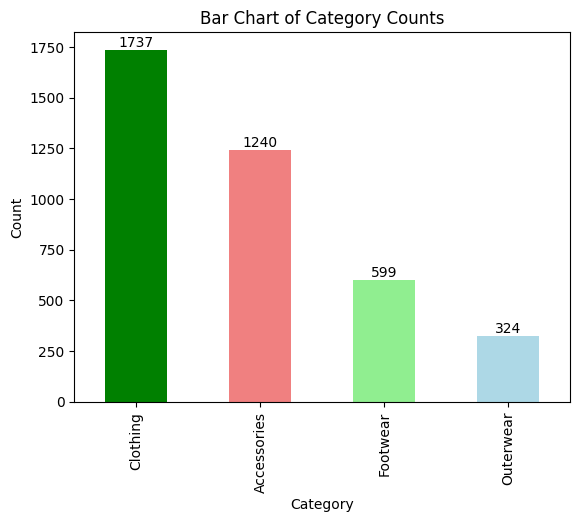

In [ ]:
category_counts = df['Category'].value_counts()
custom_colors = ['green', 'lightcoral', 'lightgreen', 'lightblue', 'salmon']

category_counts.plot(kind='bar', color= custom_colors)

for index, value in enumerate(category_counts):
    plt.text(index, value + 1, str(value), ha = 'center', va = 'bottom')

plt.title('Bar Chart of Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


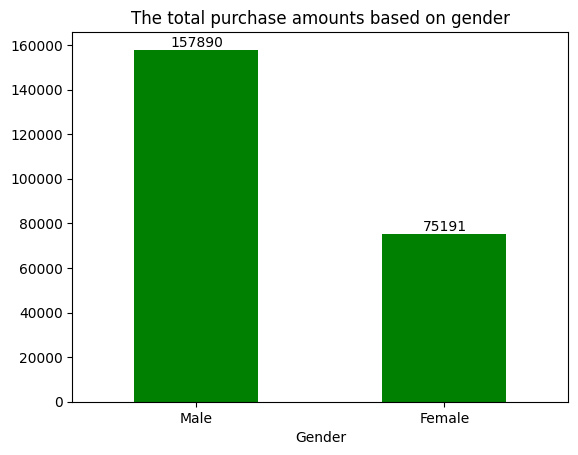

In [ ]:
ax = df.groupby("Gender")["Purchase Amount (USD)"].sum().sort_values(ascending = False)

ax.plot(kind = 'bar', color = 'green', rot = 0)

for index, value in enumerate(ax):
  plt.text(index, value+1, str(value), ha = 'center', va = 'bottom')

plt.title('The total purchase amounts based on gender')
plt.show()

In [ ]:
#three most common items
df['Item Purchased'].value_counts().head(3)

Blouse     171
Jewelry    171
Pants      171
Name: Item Purchased, dtype: int64

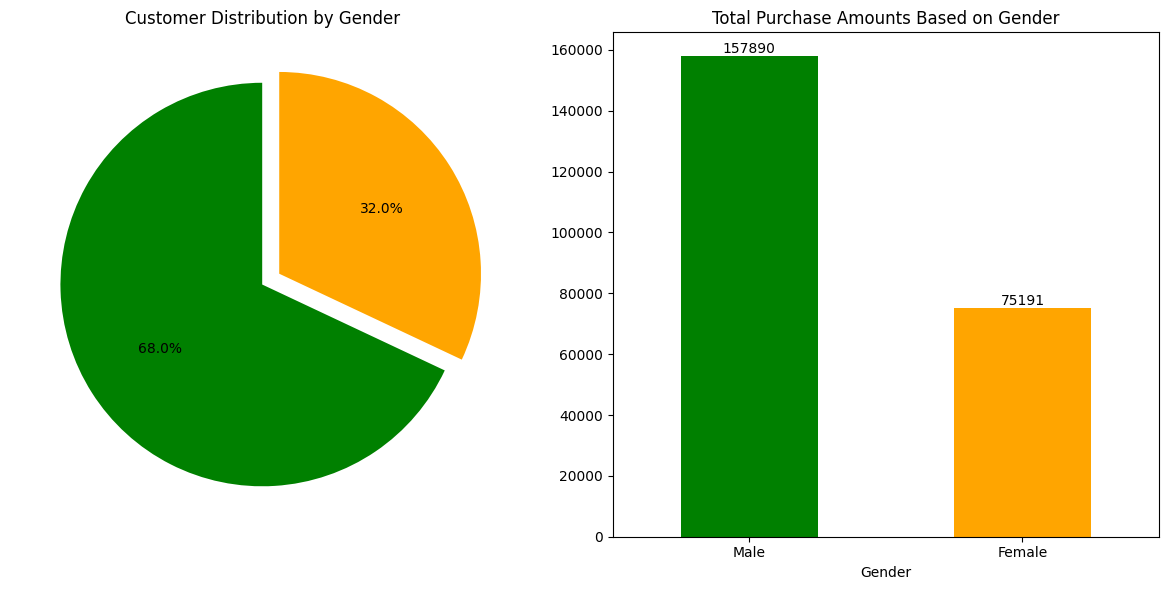

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#pie chart
gender_counts = df['Gender'].value_counts()
colors = ['green', 'orange']
explode = (0, 0.1)
axes[0].pie(gender_counts, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
axes[0].set_title('Customer Distribution by Gender')

#bar chart
purchase_amounts = df.groupby("Gender")["Purchase Amount (USD)"].sum().sort_values(ascending=False)
purchase_amounts.plot(kind='bar', color= colors, rot=0, ax=axes[1])

# Adding values on top of each bar
for index, value in enumerate(purchase_amounts):
    axes[1].text(index, value + 1, str(value), ha='center', va='bottom')

axes[1].set_title('Total Purchase Amounts Based on Gender')


plt.tight_layout()
plt.show()


# **Purchase** **patterns**

In [ ]:
item_counts = df['Item Purchased'].value_counts()
item_counts

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

In [ ]:
#the most popular purchased items among female
male_data = df[df['Gender'] == 'Male']

item_counts = male_data['Item Purchased'].value_counts()

item_counts.head()

Pants      123
Jewelry    119
Coat       114
Dress      114
Sweater    114
Name: Item Purchased, dtype: int64

In [ ]:
#the most popular purchased items among female
female_data = df[df['Gender'] == 'Male']

item_counts = female_data['Item Purchased'].value_counts()

item_counts.head()

Pants      123
Jewelry    119
Coat       114
Dress      114
Sweater    114
Name: Item Purchased, dtype: int64

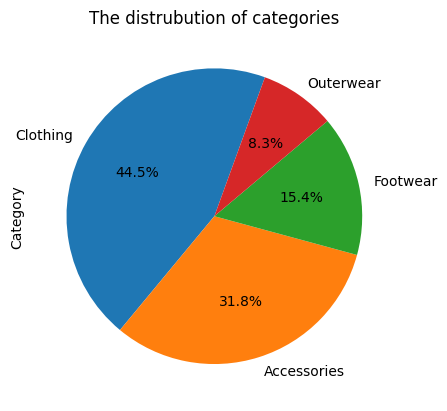

In [ ]:
#the most frequently purchased categories.
category = df['Category'].value_counts()
category.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 70)
plt.title('The distrubution of categories')
plt.show()


In [ ]:
#the average purchase amount
df['Purchase Amount (USD)'].mean().round()


60.0

In [ ]:
#the average purchase amount based on gender

df.groupby("Gender")["Purchase Amount (USD)"].mean()


Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64

# **Location analysis**

In [ ]:
top_five = df['Location'].value_counts().head()
top_five



Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Name: Location, dtype: int64

In [ ]:
bottom_five = df['Location'].value_counts().tail()
bottom_five

New Jersey      67
Hawaii          65
Arizona         65
Kansas          63
Rhode Island    63
Name: Location, dtype: int64

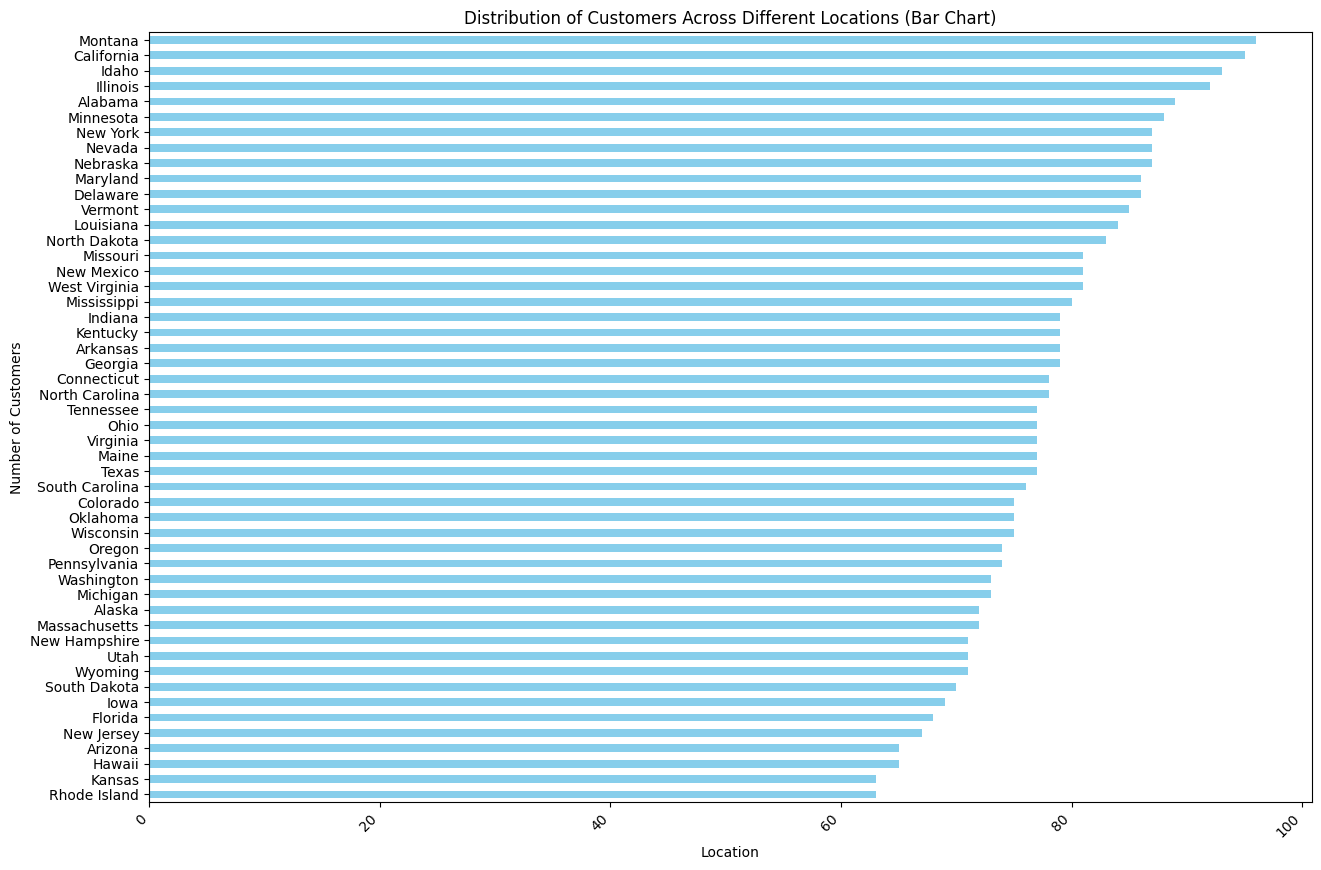

In [ ]:
location_counts = df['Location'].value_counts(ascending = True)

plt.figure(figsize=(15, 10))
location_counts.plot(kind='barh', color='skyblue')

plt.title('Distribution of Customers Across Different Locations (Bar Chart)')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#whether certain items are more popular in specific locations.
df.groupby("Item Purchased")["Location"].value_counts().head()

Item Purchased  Location  
Backpack        Nevada        10
                Nebraska       8
                Alaska         5
                Arizona        5
                California     5
Name: Location, dtype: int64

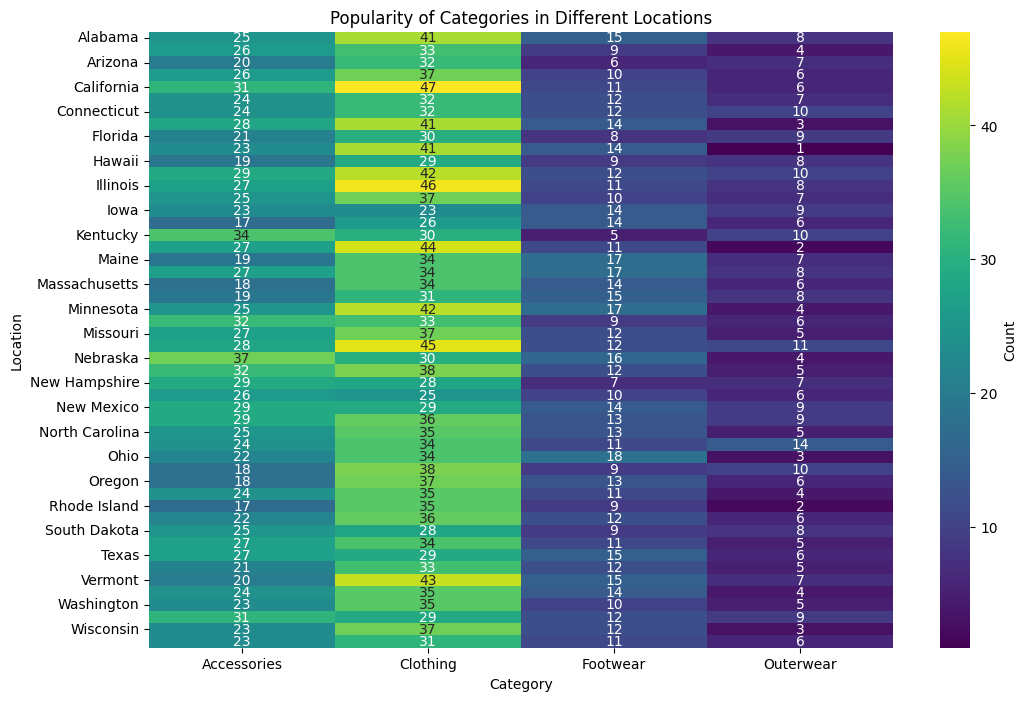

In [ ]:
location_category_counts = df.groupby(['Location', 'Category']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
heatmap_data = location_category_counts.pivot(index = 'Location', columns = 'Category', values = 'Count')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Count'})

plt.title('Popularity of Categories in Different Locations')
plt.show()

In [ ]:
df['Category'].value_counts()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

In [ ]:
df['Item Purchased'].value_counts()

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

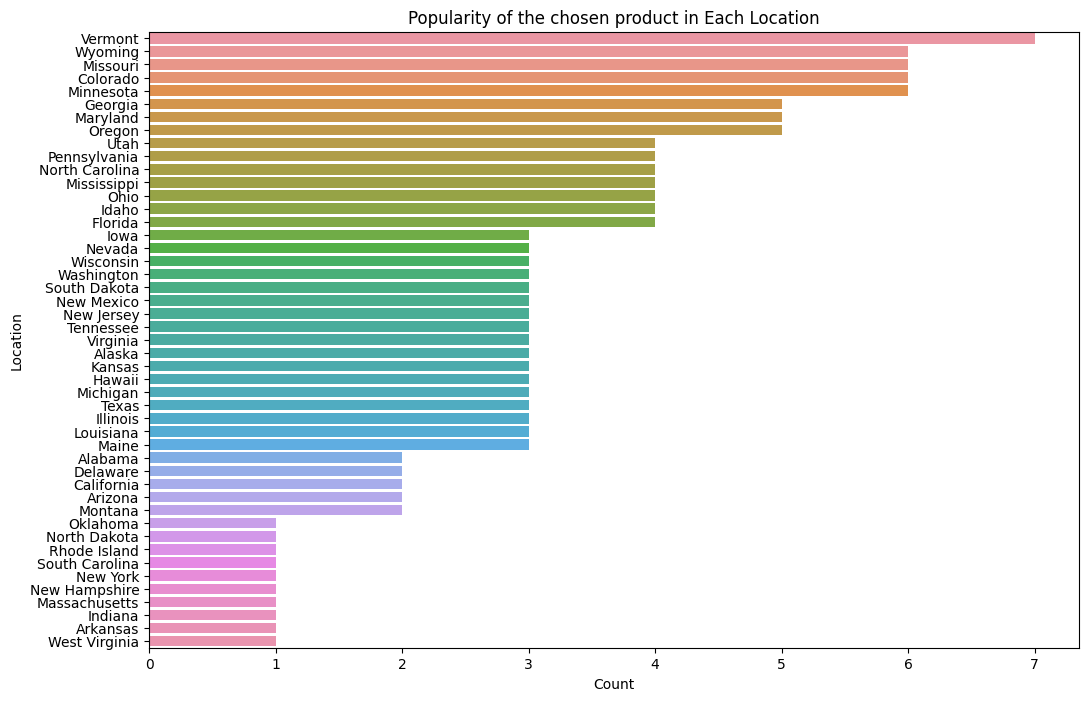

In [ ]:
#you can shoose any product and the representation illustrate its popularity among different locations
chosen_product_data = df[df['Item Purchased'] == 'Sneakers']
location_counts = chosen_product_data.groupby('Location').size().reset_index(name='Count')

location_counts = location_counts.sort_values(by='Count', ascending = False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Location', data=location_counts, orient = 'h')

plt.title(f'Popularity of the chosen product in Each Location')
plt.show()

# **Seasonal trends**

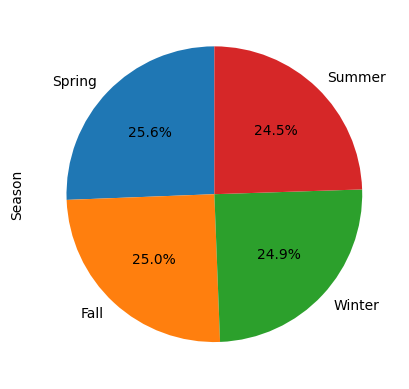

In [ ]:
season = df['Season'].value_counts()
season.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90)
plt.show()

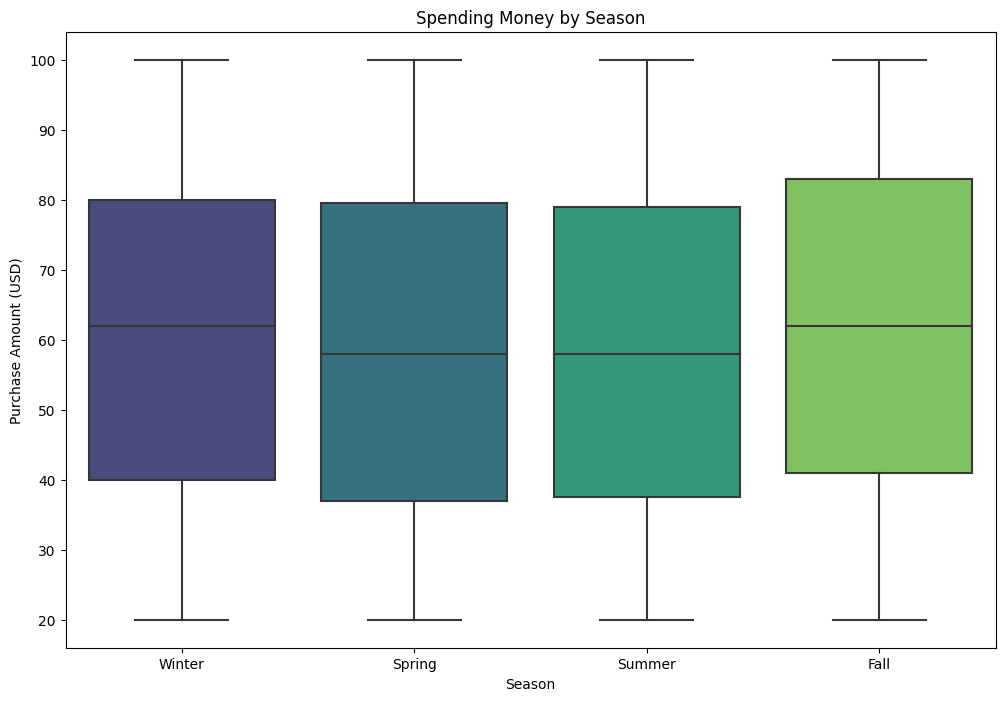

In [ ]:
# does spending money depend on seasons?
plt.figure(figsize=(12, 8))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df, palette='viridis')

plt.title('Spending Money by Season')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.show()

In [ ]:
df['Season']

0       Winter
1       Winter
2       Spring
3       Spring
4       Spring
         ...  
3895    Summer
3896    Spring
3897    Spring
3898    Summer
3899    Spring
Name: Season, Length: 3900, dtype: object

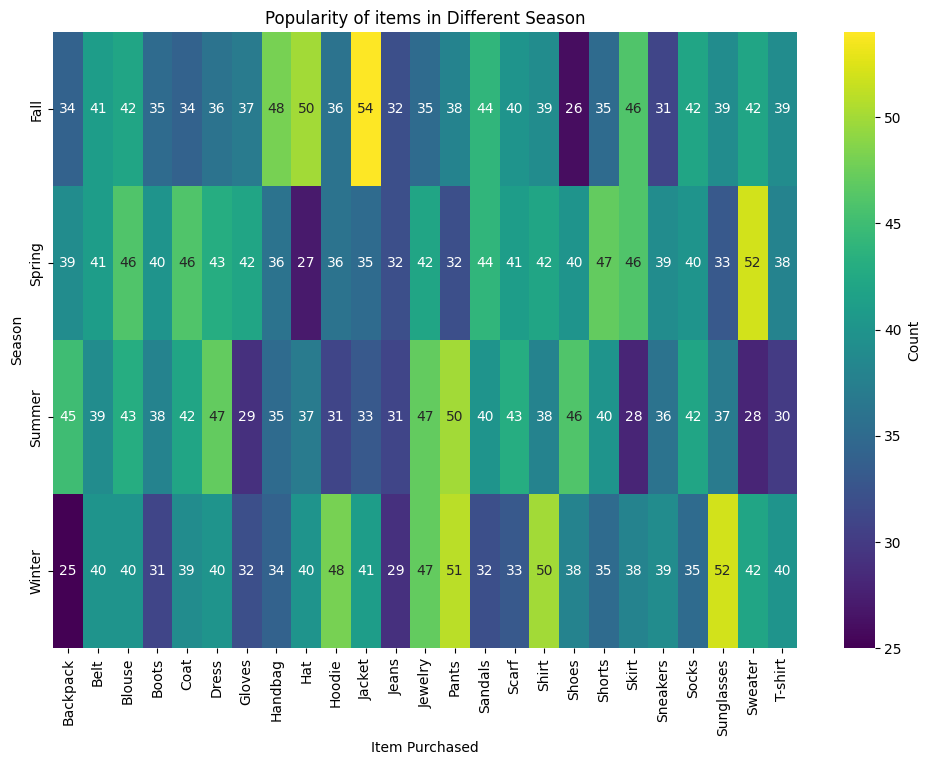

In [ ]:
#Identifing which items are popular in different seasons.
Season_item_counts = df.groupby(['Season', 'Item Purchased']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
heatmap_data = Season_item_counts.pivot(index = 'Season', columns = 'Item Purchased', values = 'Count')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Count'})
plt.title('Popularity of items in Different Season')
plt.show()

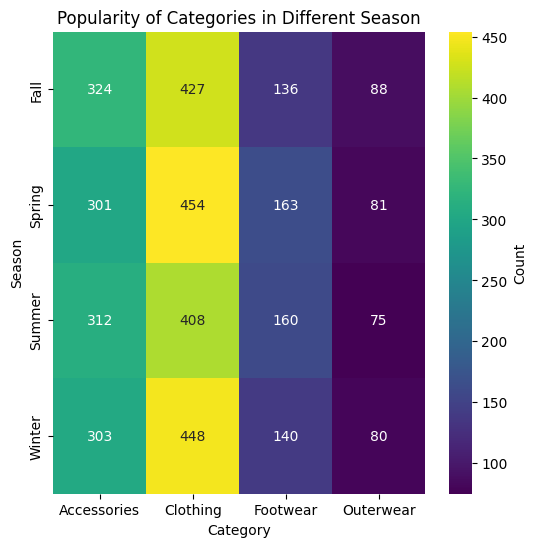

In [ ]:
#Identifing which item or categories are popular in different seasons.
Season_category_counts = df.groupby(['Season', 'Category']).size().reset_index(name='Count')

plt.figure(figsize=(6, 6))
heatmap_data = Season_category_counts.pivot(index = 'Season', columns = 'Category', values = 'Count')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Count'})

plt.title('Popularity of Categories in Different Season')
plt.show()

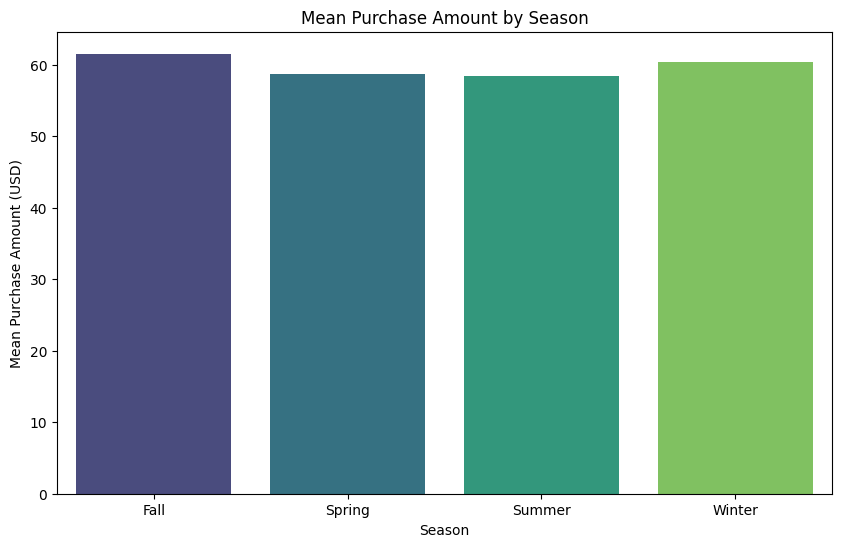

In [ ]:
#Analyzing how purchase amounts change with seasons.
season_purchase_means = df.groupby('Season')['Purchase Amount (USD)'].mean().reset_index(name='Mean Purchase Amount')

plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Mean Purchase Amount', data=season_purchase_means, palette='viridis')

plt.title('Mean Purchase Amount by Season')
plt.xlabel('Season')
plt.ylabel('Mean Purchase Amount (USD)')
plt.show()

# **Customer Reviews**

In [ ]:


bins = [2.5, 3, 3.5, 4, 4.5, 5]
labels = ['2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5']

df['Rating Range'] = pd.cut(df['Review Rating'], bins=bins, labels=labels, right=False)

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Segment,Rating Range
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,45-60,3-3.5
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,18-30,3-3.5
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,45-60,3-3.5
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-30,3.5-4
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,45-60,2.5-3


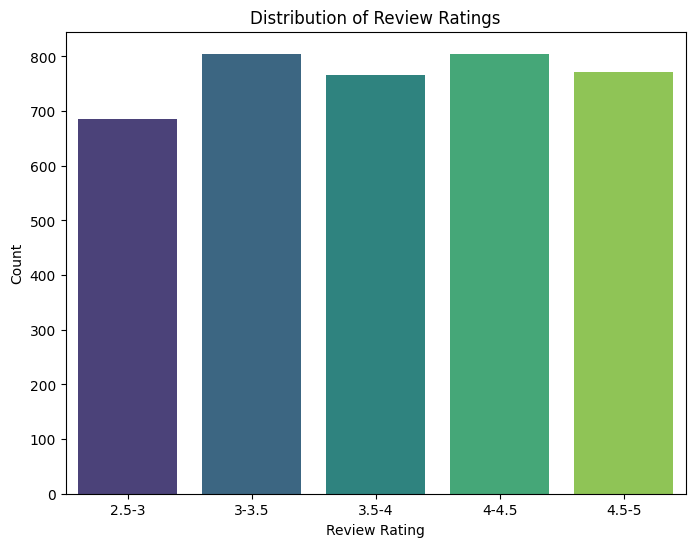

In [ ]:
#Analyzing the distribution of review ratings.
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating Range', data=df, palette='viridis')

plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
#Identify the most and least reviewed items or categories.
item_avg_rating = df.groupby('Item Purchased')['Review Rating'].mean().reset_index(name='Average Rating')


most_reviewed_items = item_avg_rating.sort_values(by='Average Rating', ascending=False).head(4)
least_reviewed_items = item_avg_rating.sort_values(by='Average Rating').head(3)

print("Most Reviewed Items or Categories:")
print(most_reviewed_items)

print("\nLeast Reviewed Items or Categories:")
print(least_reviewed_items)

Most Reviewed Items or Categories:
   Item Purchased  Average Rating
6          Gloves        3.864286
14        Sandals        3.841250
3           Boots        3.812500
8             Hat        3.806494

Least Reviewed Items or Categories:
   Item Purchased  Average Rating
16          Shirt        3.629586
11          Jeans        3.648387
2          Blouse        3.683626


In [ ]:
column1 = df['Purchase Amount (USD)']
column2 = df['Review Rating']

correlation_coef = column1.corr(column2)
correlation_coef

0.030775923073914465

So, rating review doesn't depend on purchase amount

In [ ]:
df.groupby('Review Rating')['Age Segment'].value_counts().sort_values()

Review Rating  Age Segment
2.5            60-100         10
               18-30          11
5.0            60-100         13
               18-30          17
               45-60          17
                              ..
4.2            30-45          55
4.6            30-45          56
2.8            45-60          56
3.7            45-60          58
2.6            45-60          58
Name: Age Segment, Length: 104, dtype: int64

# **Customer loyalty**

In [ ]:
#identifying loyalty and average amount of purchasing among loyalt customers
bins = [0, 5, 10, float('inf')]
labels = ['Low', 'Medium', 'High']
df['Loyalty Tier'] = pd.cut(df['Previous Purchases'], bins=bins, labels=labels, right=False)

loyalty_purchase_means = df.groupby('Loyalty Tier')['Purchase Amount (USD)'].mean().reset_index(name='Mean Purchase Amount')
loyalty_purchase_means

,Loyalty Tier,Mean Purchase Amount
0,Low,59.649852
1,Medium,62.102426
2,High,59.504699


In [ ]:
#identifying loyalty and average amount of purchasing among loyalt customers
bins = [0, 5, 10, float('inf')]
labels = ['Low', 'Medium', 'High']
df['Loyalty Tier'] = pd.cut(df['Previous Purchases'], bins=bins, labels=labels, right=False)

loyalty_purchase_means = df.groupby('Loyalty Tier')['Frequency of Purchases'].mean().reset_index(name='Mean frequency')
loyalty_purchase_means

,Loyalty Tier,Mean frequency
0,Low,84.682493
1,Medium,93.296496
2,High,89.119048


In [ ]:
loyalty_rating_means = df.groupby('Loyalty Tier')['Review Rating'].mean().reset_index(name='Mean review rating')
loyalty_rating_means

,Loyalty Tier,Mean review rating
0,Low,3.781602
1,Medium,3.794340
2,High,3.741447


# **Subscription Status**

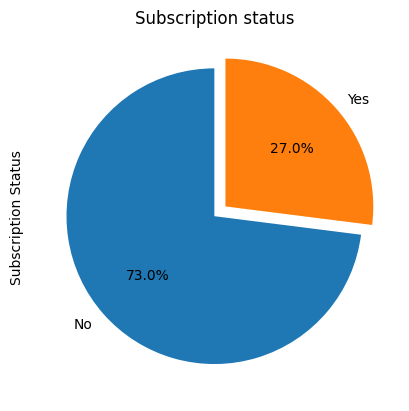

In [ ]:
subscription_status = df['Subscription Status'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', startangle= 90, explode = (0, 0.1))
plt.title('Subscription status')
plt.show()

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Segment,Rating Range,Loyalty Tier
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,45-60,3-3.5,High
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,18-30,3-3.5,Low
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,45-60,3-3.5,High
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-30,3.5-4,High
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,45-60,2.5-3,High


In [ ]:
df['Frequency of Purchases'].value_counts()

Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency of Purchases, dtype: int64

In [ ]:
replace_dict = {'Yes': 1, 'No': 0, 'Every 3 Months':90, 'Annually':365, 'Quarterly':90, 'Monthly':30, 'Bi-Weekly':14, 'Fortnightly':14, 'Weekly':7}

df.replace(replace_dict, inplace = True)

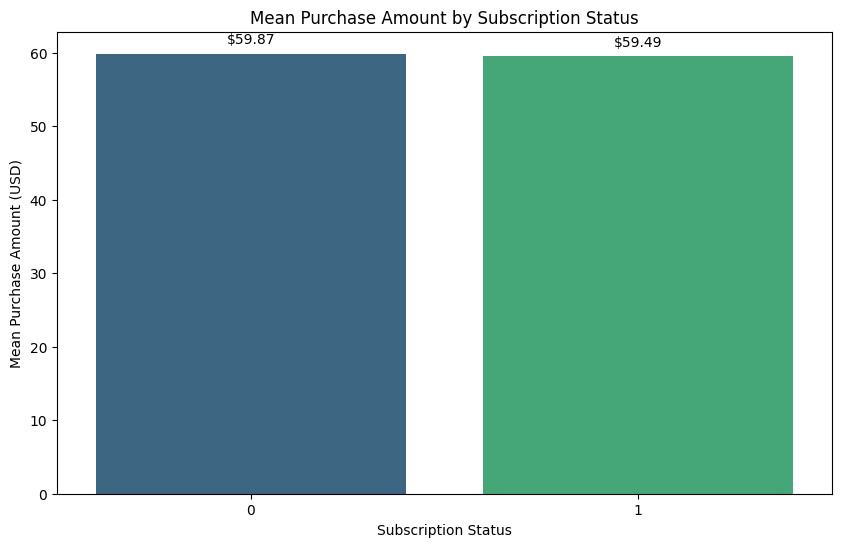

In [ ]:
purchase_means = df.groupby('Subscription Status')['Purchase Amount (USD)'].mean().reset_index(name='Mean Purchase Amount')


plt.figure(figsize=(10, 6))
sns.barplot(x='Subscription Status', y='Mean Purchase Amount', data=purchase_means, palette='viridis')


for index, row in purchase_means.iterrows():
    plt.text(index, row['Mean Purchase Amount'] + 1, f"${row['Mean Purchase Amount']:.2f}", ha='center', va='bottom')

plt.title('Mean Purchase Amount by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Mean Purchase Amount (USD)')
plt.show()

In [ ]:
purchase_means = df.groupby('Subscription Status')['Purchase Amount (USD)'].mean()
purchase_means


Subscription Status
0    59.865121
1    59.491928
Name: Purchase Amount (USD), dtype: float64

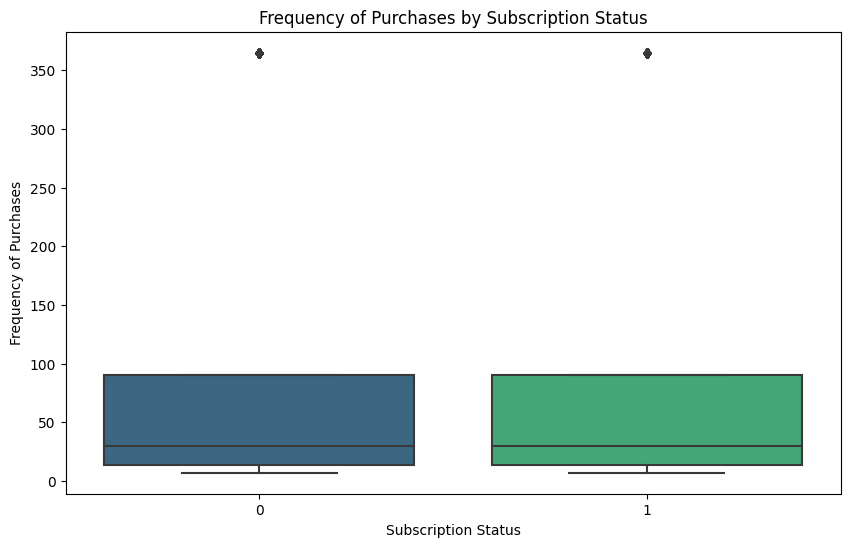

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Subscription Status', y='Frequency of Purchases', data=df, palette='viridis')

plt.title('Frequency of Purchases by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Frequency of Purchases')
plt.show()